In [ ]:
import requests


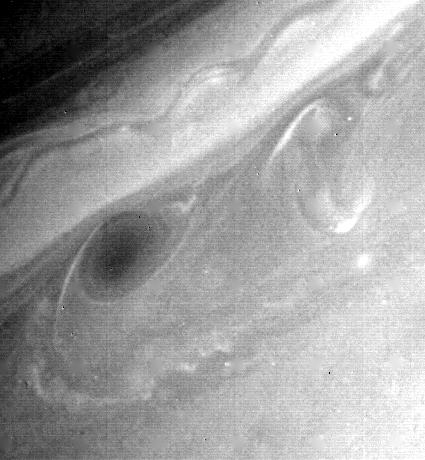

In [23]:
from PIL import Image

def open_image(uri):
  return Image.open(requests.get(uri, stream=True).raw)

open_image("http://images-assets.nasa.gov/image/PIA01973/PIA01973~orig.jpg")


In [24]:
from io import StringIO
import json

def parse(word, amount=10):
  uri = f"https://images-api.nasa.gov/search?q={word}&page=1&media_type=image&year_start=1920&year_end=2021"

  result = requests.get(uri)
  content = result.text

  io = StringIO(content)
  images = json.load(io)["collection"]["items"]

  links_to_images = []
  for image in images[:amount]:
    href = image["href"]
    content = requests.get(href).text
    links = json.load(StringIO(content))
    links_to_images.append(links[0])

  images = [open_image(link) for link in links_to_images]

  return images

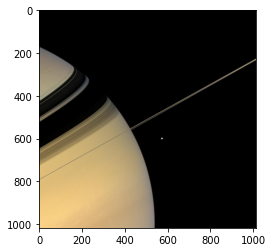

In [27]:
from matplotlib.pyplot import imshow

imshow(parse("saturn")[3])

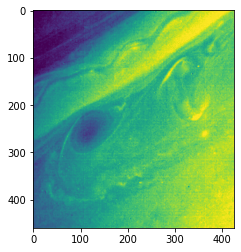

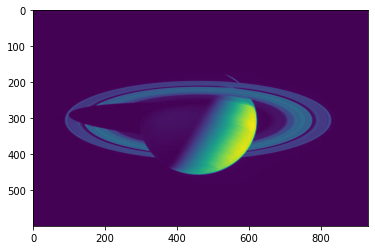

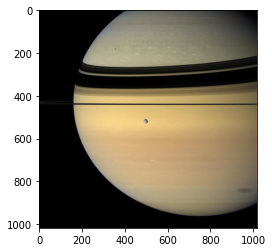

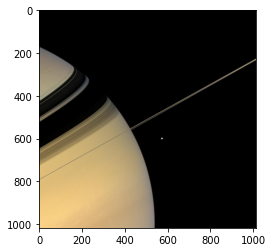

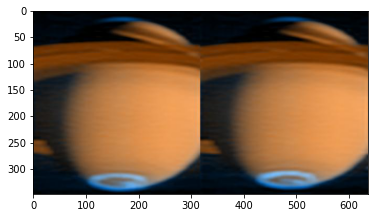

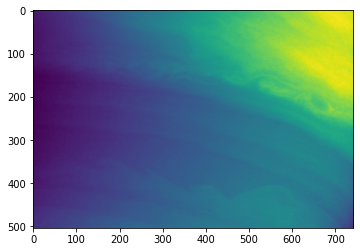

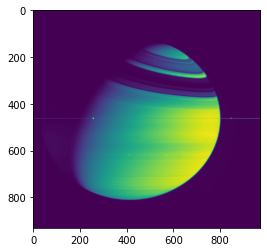

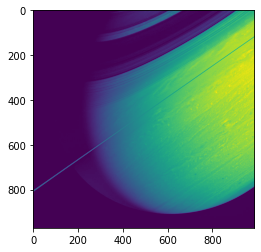

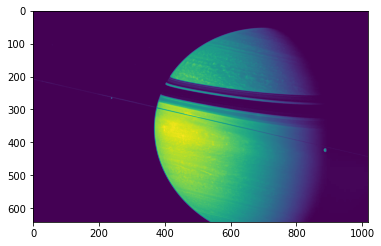

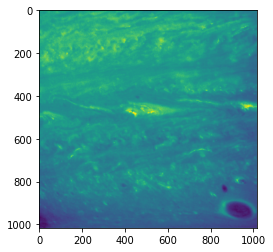

In [28]:
import matplotlib.pyplot as plt

def imshows(images):
  for image in images:
    plt.figure()
    plt.imshow(image)

imshows(parse("saturn"))